In [1]:
import os

# Clone the repository
repo_url = "https://github.com/ras0k/whisper-rap-queb"
repo_name = repo_url.split('/')[-1]
!git clone {repo_url}

# Define source and destination paths
source_dir_1 = os.path.join(repo_name, "benchmark", "top50_lyrics_genius_cleaned2")
dest_dir_1 = "/content"
source_dir_2 = os.path.join(repo_name, "benchmark", "top50_lyrics_whisper_cleaned")
dest_dir_2 = "/content"

# Move the folders
if os.path.exists(source_dir_1):
    !mv {source_dir_1} {dest_dir_1}
    print(f"Moved {source_dir_1} to {dest_dir_1}")
else:
    print(f"Source directory not found: {source_dir_1}")

if os.path.exists(source_dir_2):
    !mv {source_dir_2} {dest_dir_2}
    print(f"Moved {source_dir_2} to {dest_dir_2}")
else:
    print(f"Source directory not found: {source_dir_2}")

# Clean up: remove the cloned repository
if os.path.exists(repo_name):
    !rm -rf {repo_name}
    print(f"Cleaned up cloned repository: {repo_name}")

# Verify that the folders are in /content
print("\nContents of /content after download:")
!ls -d /content/*/

Cloning into 'whisper-rap-queb'...
remote: Enumerating objects: 425, done.
remote: Counting objects: 100% (425/425), done.
remote: Compressing objects: 100% (417/417), done.
remote: Total 425 (delta 144), reused 106 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (425/425), 12.85 MiB | 25.65 MiB/s, done.
Resolving deltas: 100% (144/144), done.
Moved whisper-rap-queb/benchmark/top50_lyrics_genius_cleaned2 to /content
Moved whisper-rap-queb/benchmark/top50_lyrics_whisper_cleaned to /content
Cleaned up cloned repository: whisper-rap-queb

Contents of /content after download:
/content/sample_data/			/content/top50_lyrics_whisper_cleaned/
/content/top50_lyrics_genius_cleaned2/


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 19.5 MB/s eta 0:00:00
🚀 Génération du Rapport Final sur 38 fichiers...
   Mode : Comparaison 'Cleaned 2' avec suppression des sauts de ligne.

📊 BILAN DE PERFORMANCE (Whisper vs Genius Cleaned 2)
Nombre de fichiers   : 38
Précision Moyenne    : 57.17%
Précision Médiane    : 60.75%
------------------------------------------------------------
⚠️ CONCLUSION : Performance mitigée, vérifier les fichiers à faible score.
------------------------------------------------------------


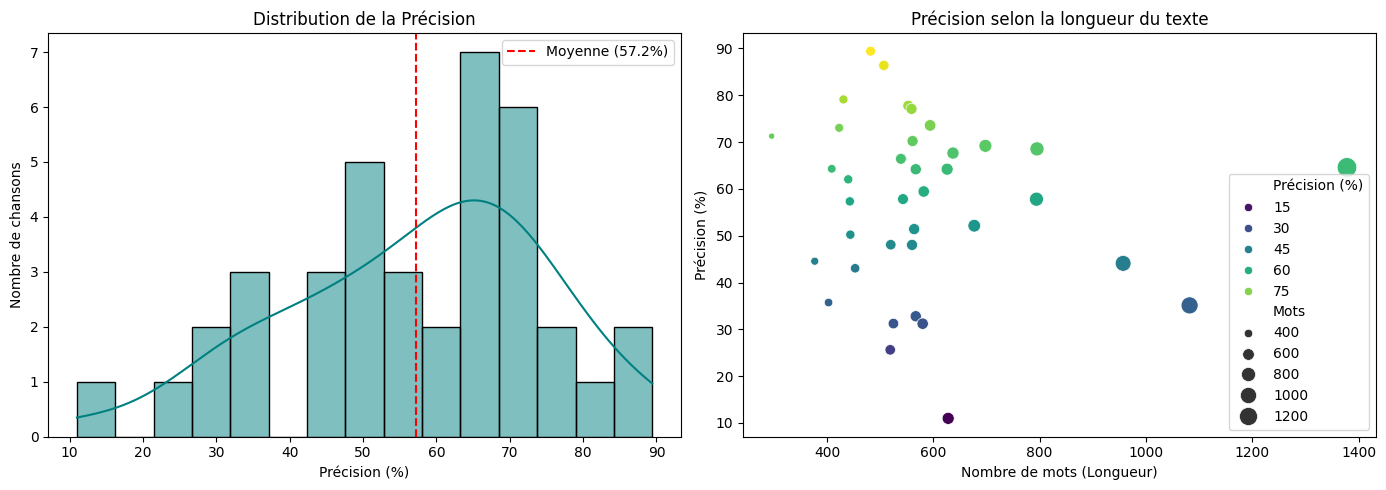



🏆 TOP 5 - LES MEILLEURS RÉSULTATS


,Titre,Précision (%),WER,Mots
32,44-Mauvais garçons,89.42,0.1058,482
34,46-A laise,86.39,0.1361,507
1,03-Toutes les femmes savent danser,79.12,0.2088,431
14,20-Blacklights,77.76,0.2224,553
22,30-For The Low,77.10,0.2290,559




💩 FLOP 5 - LES MOINS BONS RÉSULTATS


,Titre,Précision (%),WER,Mots
33,45-Johnny,10.99,0.8901,628
3,06-TTTTT,25.63,0.7437,519
31,43-Devenir Fou,31.21,0.6879,580
27,39-Ça que ctait,31.24,0.6876,525
19,27-PRMF,32.80,0.6720,567



📋 RAPPORT DÉTAILLÉ


,Titre,Précision (%),WER,Mots
32,44-Mauvais garçons,89.42,0.1058,482
34,46-A laise,86.39,0.1361,507
1,03-Toutes les femmes savent danser,79.12,0.2088,431
14,20-Blacklights,77.76,0.2224,553
22,30-For The Low,77.10,0.2290,559
28,40-La route est longue,73.57,0.2643,594
4,08-Nouveaux riches,73.05,0.2695,423
29,41-Dans la nuit,71.28,0.2872,296
2,04-Dans les buissons,70.23,0.2977,561
36,49-24 heures à vivre,69.20,0.3080,698


In [2]:
try:
    import jiwer
except ImportError:
    !pip install -q jiwer pandas matplotlib seaborn
    import jiwer

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import data_table

# --- CONFIGURATION ---
dir_ref = "top50_lyrics_genius_cleaned2"  # La référence validée (Sans parenthèses)
dir_hyp = "top50_lyrics_whisper_cleaned"  # L'hypothèse (Whisper)

# --- FONCTION : APLATIR LE TEXTE ---
def flatten_text(text):
    """Retire tous les sauts de ligne pour comparer le flux de mots uniquement."""
    if not text: return ""
    return " ".join(text.split())

def generate_final_report():
    results = []

    if not os.path.exists(dir_ref):
        print("❌ Dossier Cleaned 2 introuvable.")
        return

    files = sorted([f for f in os.listdir(dir_ref) if f.endswith('.txt')])
    whisper_files = set(os.listdir(dir_hyp))

    print(f"🚀 Génération du Rapport Final sur {len(files)} fichiers...")
    print(f"   Mode : Comparaison 'Cleaned 2' avec suppression des sauts de ligne.\n")

    for filename in files:
        base_name, ext = os.path.splitext(filename)
        whisper_name = f"{base_name}_whisper{ext}"

        # On ignore silencieusement les fichiers manquants pour ne pas polluer le rapport
        if whisper_name not in whisper_files:
            continue

        p_ref = os.path.join(dir_ref, filename)
        p_hyp = os.path.join(dir_hyp, whisper_name)

        try:
            with open(p_ref, 'r', encoding='utf-8') as f: raw_ref = f.read().strip()
            with open(p_hyp, 'r', encoding='utf-8') as f: raw_hyp = f.read().strip()

            # 1. Aplatissement (Le secret pour un bon score)
            text_ref = flatten_text(raw_ref)
            text_hyp = flatten_text(raw_hyp)

            # 2. Calculs
            if not text_ref:
                wer = 1.0 if text_hyp else 0.0
            else:
                wer = jiwer.wer(text_ref, text_hyp)

            # Précision (100 - WER, bornée à 0)
            acc = max(0, (1 - wer) * 100)

            # On compte les mots pour l'analyse de corrélation
            word_count = len(text_ref.split())

            results.append({
                'Titre': base_name,
                'Précision (%)': round(acc, 2),
                'WER': round(wer, 4),
                'Mots': word_count
            })

        except Exception as e:
            print(f"⚠️ Erreur sur {filename}: {e}")

    if not results:
        print("❌ Aucune donnée à analyser.")
        return

    df = pd.DataFrame(results)

    # --- 1. STATISTIQUES GLOBALES ---
    avg_acc = df['Précision (%)'].mean()
    median_acc = df['Précision (%)'].median()

    print("="*60)
    print("📊 BILAN DE PERFORMANCE (Whisper vs Genius Cleaned 2)")
    print("="*60)
    print(f"Nombre de fichiers   : {len(df)}")
    print(f"Précision Moyenne    : {avg_acc:.2f}%")
    print(f"Précision Médiane    : {median_acc:.2f}%")
    print("-" * 60)

    if avg_acc > 90:
        print("🌟 CONCLUSION : Excellente performance globale !")
    elif avg_acc > 80:
        print("✅ CONCLUSION : Très bonne performance, quelques erreurs mineures.")
    else:
        print("⚠️ CONCLUSION : Performance mitigée, vérifier les fichiers à faible score.")
    print("-" * 60)

    # --- 2. GRAPHIQUES ---
    plt.figure(figsize=(14, 5))

    # A. Histogramme
    plt.subplot(1, 2, 1)
    sns.histplot(df['Précision (%)'], bins=15, kde=True, color='teal')
    plt.title('Distribution de la Précision')
    plt.xlabel('Précision (%)')
    plt.ylabel('Nombre de chansons')
    plt.axvline(avg_acc, color='red', linestyle='--', label=f'Moyenne ({avg_acc:.1f}%)')
    plt.legend()

    # B. Scatter Plot (Longueur vs Qualité)
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=df, x='Mots', y='Précision (%)', hue='Précision (%)', palette='viridis', size='Mots', sizes=(20, 200))
    plt.title('Précision selon la longueur du texte')
    plt.xlabel('Nombre de mots (Longueur)')
    plt.ylabel('Précision (%)')

    plt.tight_layout()
    plt.show()
    print("\n")

    # --- 3. CLASSEMENTS ---
    cols = ['Titre', 'Précision (%)', 'WER', 'Mots']

    print("🏆 TOP 5 - LES MEILLEURS RÉSULTATS")
    display(df.sort_values(by='Précision (%)', ascending=False).head(5)[cols])
    print("\n")

    print("💩 FLOP 5 - LES MOINS BONS RÉSULTATS")
    display(df.sort_values(by='Précision (%)', ascending=True).head(5)[cols])

    # --- 4. TABLEAU COMPLET ---
    print("\n📋 RAPPORT DÉTAILLÉ")
    data_table.enable_dataframe_formatter()
    display(df.sort_values(by='Précision (%)', ascending=False))

# Lancer le rapport
generate_final_report()

Mean Teksta: 41.859210526315785
Mean Notre (Converted): 42.83263157894737


/tmp/ipython-input-3750190806.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Source', y='Value', data=combined_df, palette={'Teksta WER Calculator': 'purple', 'Notre analyse': 'green'})


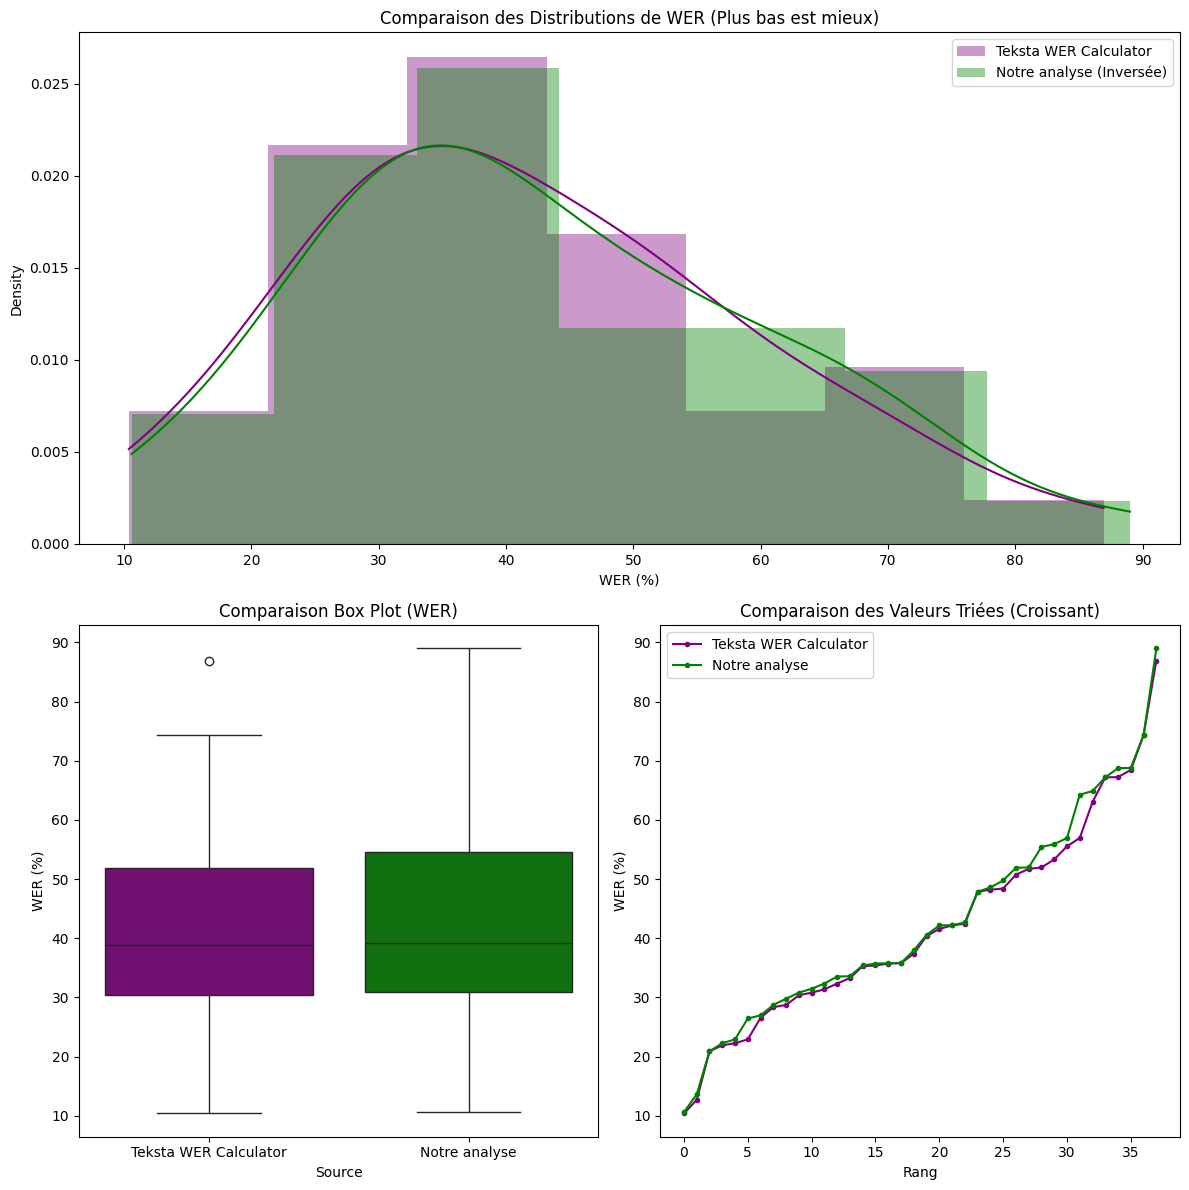

In [3]:
import pandas as pd
import io
import re
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data 1: Teksta (Purple) ---
data1_str = """01  30.35
03  20.88
04  28.34
06  74.37
08  26.54
09  53.32
10  51.73
11  42.44
12  35.4
15  47.86
16  35.8
17  50.74
18  35.26
19  51.96
20  22.24
21  41.56
22  37.36
23  48.40
25  35.70
27  67.2
28  40.38
29  55.54
30  22.9
32  31.36
34  56.95
36  48.20
38  63.03
39  67.24
40  21.89
41  28.72
42  32.34
43  68.45
44  10.37
45  86.94
46  12.65
47  42.17
49  30.8
50  33.27"""
df1 = pd.read_csv(io.StringIO(data1_str), sep=r'\s+', header=None, names=['ID', 'Value'])
df1['Source'] = 'Teksta WER Calculator'

# --- Data 2: Notre analyse (Green) ---
# We need to invert this: WER = 100 - Precision
data2_str = """indexTitrePrécision (%)WERMots
3244-Mauvais garçons89.420.105848
23446-A laise86.390.1361507
103-Toutes les femmes savent danser79.120.2088431
11420-Blacklights77.760.2224553
2230-For The Low77.10.229559
2840-La route est longue73.570.264359
4408-Nouveaux riches73.050.2695423
2941-Dans la nuit71.280.2872296
204-Dans les buissons70.230.2977561
3649-24 heures à vivre69.20.308698
2332-Montréal-Nord68.550.3145795
3042-Dis moi67.660.3234637
001-SO le Flem66.480.3352540
3750-Médailles66.420.3358539
812-Les choses se passent64.590.3541137
81825-Sometimes All The Time64.30.357409
1218-Enfant de lasphalte64.220.3578626
1016-La folle64.20.3585671
622-Hell What a View62.050.3795440
2028-Je me souviens59.450.405558
23547-Mode de vie57.830.4217543
1521-Le secret des dieux57.810.4219794
711-56K57.340.4266443
915-XOXO52.140.4786677
1723-Désirée51.420.4858564
2536-Pour la vie50.230.4977444
610-Gayé48.080.5192520
1319-Un ours mal léché48.040.5196560
509-38 SPECIAL44.560.5544377
2129-On My Life44.10.5599572
434-OUIN43.050.5695453
2638-Makeup35.730.6427403
1117-Explosif35.120.6488108
21927-PRMF32.80.6725672
739-Ça que ctait31.240.6876525
3143-Devenir Fou31.210.6879580
306-TTTTT25.630.7437519
3345-Johnny10.99"""

parsed_data2 = []
lines = data2_str.strip().split('\n')[1:]
for line in lines:
    prec_match = re.search(r'(\d{1,3}\.\d+)(?=0\.\d+|$)', line)
    if prec_match:
        precision = float(prec_match.group(1))
        # CONVERSION: WER = 100 - Precision
        wer_val = 100 - precision
        parsed_data2.append({'Value': wer_val, 'Source': 'Notre analyse'})

df2 = pd.DataFrame(parsed_data2)

# Combine for plotting
combined_df = pd.concat([df1[['Value', 'Source']], df2[['Value', 'Source']]])

# Calculate basic stats for commentary
mean1 = df1['Value'].mean()
mean2 = df2['Value'].mean()

print(f"Mean Teksta: {mean1}")
print(f"Mean Notre (Converted): {mean2}")

# Plotting
plt.figure(figsize=(12, 12))

# 1. Distribution Comparison (Histogram/KDE)
plt.subplot(2, 1, 1)
# Note: Common bins for better comparison
sns.histplot(data=df1, x='Value', color='purple', label='Teksta WER Calculator', kde=True, alpha=0.4, stat="density", linewidth=0)
sns.histplot(data=df2, x='Value', color='green', label='Notre analyse (Inversée)', kde=True, alpha=0.4, stat="density", linewidth=0)
plt.title('Comparaison des Distributions de WER (Plus bas est mieux)')
plt.xlabel('WER (%)')
plt.legend()

# 2. Side-by-Side Box Plot
plt.subplot(2, 2, 3)
sns.boxplot(x='Source', y='Value', data=combined_df, palette={'Teksta WER Calculator': 'purple', 'Notre analyse': 'green'})
plt.title('Comparaison Box Plot (WER)')
plt.ylabel('WER (%)')

# 3. Sorted Values Comparison
plt.subplot(2, 2, 4)
# Sort both independently to compare the "curve"
plt.plot(sorted(df1['Value']), color='purple', label='Teksta WER Calculator', marker='.', linewidth=1.5)
plt.plot(sorted(df2['Value']), color='green', label='Notre analyse', marker='.', linewidth=1.5)
plt.title('Comparaison des Valeurs Triées (Croissant)')
plt.xlabel('Rang')
plt.ylabel('WER (%)')
plt.legend()

plt.tight_layout()
plt.savefig('comparison_wer_inverted.png')